# 2. Exact Cell Decomposition 

In [1]:
import cv2
import numpy as np
import networkx as nx
import math
import matplotlib.pyplot as plt

## Upload the image ECMAP.png

In [2]:
cdata = #TODO use cv2 to import the image 'ECD_map.png'

# Show the image
plt.imshow(cdata)
plt.axis('off')  
plt.show()

SyntaxError: invalid syntax (3142659094.py, line 1)

## Convert the image into a grayscale image

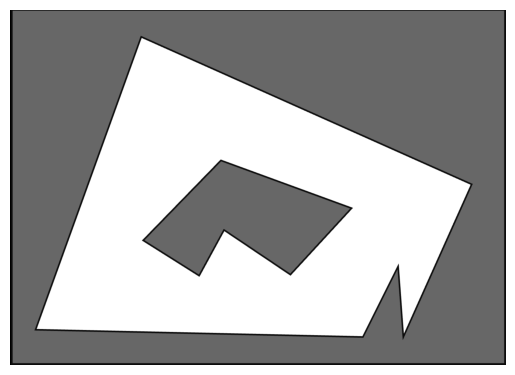

In [ ]:
BW = #TODO #Use cv2 to convert the image into a grayscale image

plt.imshow(BW, cmap='gray')
plt.axis('off') 
plt.show()


## Binarize the image

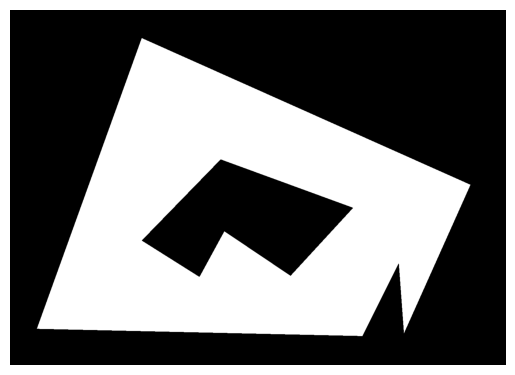

In [ ]:
_, BW2 = #TODO  Use cv2 to onvert the image into a grayscale image

# Show the image
plt.imshow(BW2, cmap='gray')
plt.axis('off') 
plt.show()


## Let's divide the image in cells

In [ ]:

def grid_image(map):
    vertical_lines = []
    horizontal_lines = []

    height, thickness = len(map), len(map[0])

    # This for cycle divides the image in equidistant vertical stribes 
    for coloumn in range(0, thickness, 100):
        start_coloumn = coloumn
        fine_colonna = min(coloumn + 100, thickness)
        vertical_lines.append((start_coloumn, fine_colonna))

    # This for cycle divides the image in equidistant horizontal stribes 
    for row in range(0, height, 100):
        start_row = row
        fine_riga = min(row + 100, height)
        horizontal_lines.append((start_row, fine_riga))

    return vertical_lines, horizontal_lines


map = BW2
vertical_lines, horizontal_lines = grid_image(map)

for value in range(100, 1200, 100):
    BW2[value,:] = 0

for value in range(100, 1400, 100):
    BW2[:, value] = 0

## Visualize the map decomposed in cells

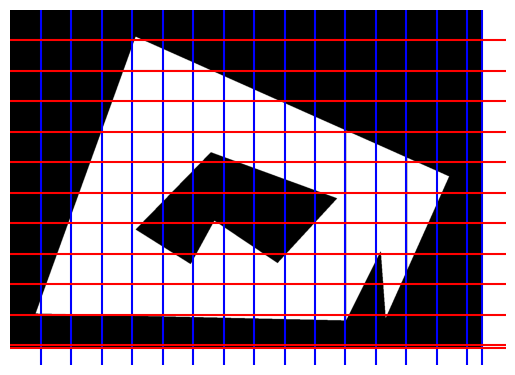

In [ ]:
plt.imshow(map, cmap='gray')
for stribe in vertical_lines:
    plt.axvline(x=stribe[1], color='blue')
for stribe in horizontal_lines:
    plt.axhline(y=stribe[1], color='red')
plt.axis('off') 
plt.show()

## Compute the centroids of the white part of each cell

In [ ]:

def compute_centroids(matrice):
    points_1 = np.argwhere(matrice == 1)  # Find the coordinates of the points = 1
    num_points = points_1.shape[0]

    if num_points == 0:
        return None  # If there are not points = 1, returns None 

    # Compute the sum of the coordinates x and y of the points = 1 
    sum_x = #TODO #Compute the sum of x coordinates of points = 1
    sum_y = #TODO #Compute the sum of y coordinates of points = 1

    # Compute the centroids like the average of coordinates x and y 
    centroid_x = #TODO #Compute the average of x coordinates of points = 1
    centroid_y = #TODO #Compute the average of y coordinates of points = 1

    return (centroid_x, centroid_y)

def compute_squares_centroids(matrix, square_dimension):
    height, thickness = matrix.shape
    centroids = []

    
    for row in range(0, height, square_dimension):
        for coloumn in range(0, thickness, square_dimension):
            square = matrix[row:row+square_dimension, coloumn:coloumn+square_dimension]
            centroid = compute_centroids(square)
            if centroid:
                centroids.append((coloumn + centroid[0], row + centroid[1]))  
    return centroids

square_dimension = 100

centroids = compute_squares_centroids(BW2, square_dimension)
print("Centroids number is:", len(centroids))


Centroids number is: 106


## Visualize the map with the centroids

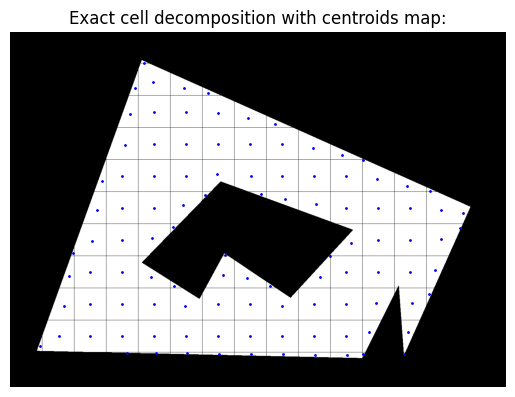

In [ ]:
fig, ax = plt.subplots()

ax.imshow(BW2, cmap = 'gray')

def plot_punti(points):
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    plt.scatter(x, y, s=1, color='b')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Exact cell decomposition with centroids map:')
    plt.grid(False)
    plt.axis('off') 
    plt.show()

plot_punti(centroids)
plt.show()

## Create now the graph with the centroids

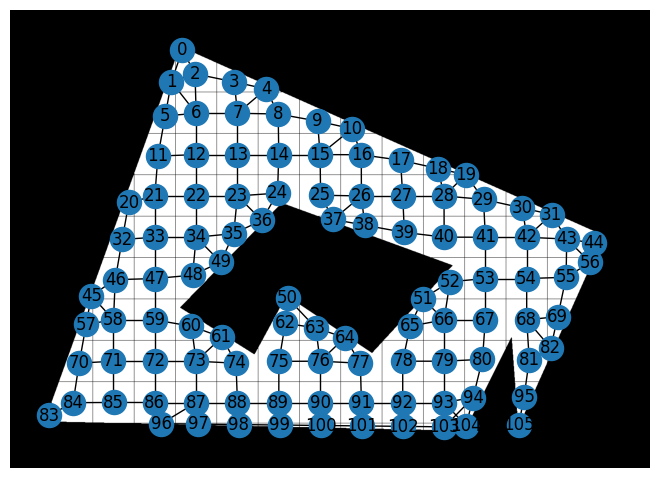

In [ ]:
G = nx.Graph()  # here we define our empty graph

# Add nodes to the graph
for i, point in enumerate(centroids):
    G.add_node(i, pos=point)

# This function computes eculdiean distance between two points
def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Let's create a graph linking couples of nodes which distance is <= 200
for i in range(len(centroids)):
    for j in range(i + 1, len(centroids)):
        if distance(centroids[i], centroids[j]) <= 100:
            G.add_edge(i, j)
         

num_nodes = G.number_of_nodes()
#print("Total number of nodes:", num_nodes)         

# Draw the graph
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=300)
plt.imshow(BW2, cmap = 'gray')
plt.show()


## Set our start node and target node

In [ ]:
start_point = #TODO   # here we can set the starting node
target_point = #TODO   # here we can set the target node
print('start_point:', start_point)
print('target_point:', target_point)

start_point: 1
target_point: 105


## Find the shortest path in the network through Dijkstra algorithm

In [ ]:
path = nx.dijkstra_path(G, start_point, target_point)

### We can check the nodes that composes the path

In [ ]:
print(#TODO) # Print our best path nodes 

[1, 6, 7, 8, 9, 10, 16, 17, 18, 19, 29, 30, 42, 54, 68, 81, 95, 105]


## And we can show now the best path

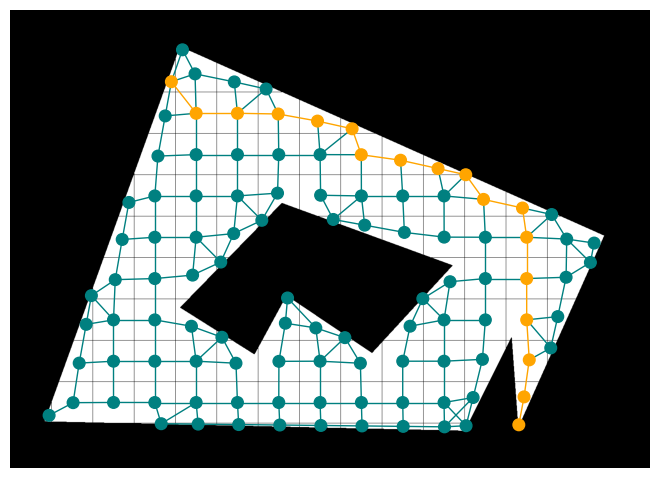

In [ ]:
# Create colors for the nertwork
nodes_color = ["orange" if n in path else "teal" for n in G.nodes()]                               #nodes color
edge_color = ["orange" if (n1, n2) in zip(path, path[1:]) else "teal" for n1, n2 in G.edges()]     #edges color

# Draw the path
nx.draw(G, nx.get_node_attributes(G, 'pos'), node_color=nodes_color, edge_color=edge_color, with_labels=False, node_size=70)
plt.imshow(BW2, cmap = 'gray')
plt.show()
